<a href="https://colab.research.google.com/github/czhurdlespeed/TFDevCert/blob/main/TFCert_Practice/08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow

## Check for GPU

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b94c0296-e73a-e17f-16ba-c0361ab908ac)


## Import Helper Functions

In [2]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2024-05-14 23:36:34--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py [following]
--2024-05-14 23:36:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-14 23:36:34 (68.3 MB/s) - ‘helper_

## Get a text dataset

- Using Kaggle's Introduction to NLP dataset

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
# Uzip data
unzip_data("nlp_getting_started.zip")

--2024-05-14 23:36:40--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   734KB/s    in 0.8s    

2024-05-14 23:36:41 (734 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [4]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df["text"][100]

'.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad'

In [6]:
# Shuffle training datafram
train_df_shuffled = train_df.sample(frac=1)
train_df_shuffled.head()

,id,keyword,location,text,target
411,594,arson,NaN,Arson suspect linked to 30 fires caught in Nor...,1
1026,1488,body%20bags,Charlotte NC,The Body Bags has a show on 08/07/2015 at 07:3...,0
7049,10100,typhoon,NaN,4Yygb mhtw4fnet\n\nThousands evacuated as Taiw...,1
4323,6138,hijack,NaN,Bayelsa poll: Tension in Bayelsa as Patience J...,1
5434,7753,police,NaN,Police unions retard justice &amp; drain gov $...,0


In [7]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# How many examples of each class are there?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [9]:
# How many locations?
train_df.location.value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Some pum pum             1
Paulton, England         1
SEA Server               1
todaysbigstock.com       1
???????? ?????????.      1
Name: count, Length: 3341, dtype: int64

In [10]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", r"(real disaster)" if target > 0 else r"(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
@LisaToddSutton The reason I bring this up  bcz he is running 4 Senate. Murphy is nothing but a Republican I am deluged with his junk mail!

---

Target: 1 (real disaster)
Text:
The Bush fires in CA are so crazy

---

Target: 0 (not real disaster)
Text:
@xeni my bet is mother nature might have plans to send a deluge our way.

---

Target: 0 (not real disaster)
Text:
Sometimes in space celestial bodies with separate trajectories that intertwine find themselves in a dance rather than a collision course.

---

Target: 0 (not real disaster)
Text:
Ancient Mayan Tablet with Hieroglyphics Honors Lowly King http://t.co/Im6m4XAeN2

---



In [12]:
print("Hello\'\\ \n")

Hello'\ 



In [13]:
print(r"Hello\'\\ \n")

Hello\'\\ \n


### Split data into training and validation sets

In [14]:
from sklearn.model_selection import train_test_split
train_sentences, validation_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                                   train_df_shuffled["target"].to_numpy(),
                                                                                   test_size=0.1)


In [15]:
# Check the lengths
len(train_sentences), len(train_labels), len(validation_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [16]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['Fun with my girls! @ Joe Cools - Durban Main Page https://t.co/AbnZQWlig1',
        'A traumatised dog that was found buried up to its head in dirt in France is now in safe hands. This is such a... http://t.co/AGQo1479xM',
        'And the fact that i have a curfew',
        'RT skanndTyagi WIRED : Reddit will now quarantine offensive content http://t.co/H0xUNJ3C7C (http://t.co/UuEw4MJLes\x89Û_ \x89Û_',
        '#WorldWatchesFerguson #Florida @GovJayNixon @clairecmc How dare you turn our streets into a war zone -a war against CITIZENS?',
        'One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1392',
        'Bamenda Floods Kill Animals Birds - http://t.co/WnamtxlfMt http://t.co/6cOIDv11qV',
        'Three-alarm fire destroys two residential buildings a car in Manchester N.H. on Sunday afternoon http://t.co/rVkyj3YUVK',
        "The 'twins' survived their first day of high school!! They're gonna have a great year!! #makinmemor

## Converting text into numbers

In [17]:
# Embedding - every word gets turned into a vector; you can specify the dimensions of the vector
  # gets updated as the network learns; therfore it can learn relationships between tokens
  # Pretrained embedding libraries e.g. word2vec, GloVe, etc.


In [18]:
# Text vectorization (tokenization)
train_sentences[:5]

array(['Fun with my girls! @ Joe Cools - Durban Main Page https://t.co/AbnZQWlig1',
       'A traumatised dog that was found buried up to its head in dirt in France is now in safe hands. This is such a... http://t.co/AGQo1479xM',
       'And the fact that i have a curfew',
       'RT skanndTyagi WIRED : Reddit will now quarantine offensive content http://t.co/H0xUNJ3C7C (http://t.co/UuEw4MJLes\x89Û_ \x89Û_',
       '#WorldWatchesFerguson #Florida @GovJayNixon @clairecmc How dare you turn our streets into a war zone -a war against CITIZENS?'],
      dtype=object)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# use the default textvectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in our vocabulary; no cap on size of vocab
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # create groups of n-words?
                                    output_mode='int', # how to map tokens to numbers
                                    output_sequence_length=None,
                                    pad_to_max_tokens=False)

In [20]:
# find the average number of tokens in the training tweets
round((sum([len(i.split()) for i in train_sentences]))/len(train_sentences))

15

In [21]:
# Setup text vectorization variables
max_vocab_length = 10000 # max num of words to have in vocab
max_length = 15 # max length our sequences will be

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [22]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [23]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[278,   3, 212,   4,  13, 697,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [24]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence} \
      \n\nVectorized versions:")
text_vectorizer([random_sentence])

Original text:
@ArizonaDOT Price Rd North bound closed from University to Rio Salado.. Lots of police..  What's crackin?       

Vectorized versions:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 2808,  942,  621, 4090,  782,   20, 2653,    5, 9083, 8867,
        1505,    6,   76,  522]])>

In [25]:
# Get the unique words in the vocab
words_in_vocab = text_vectorizer.get_vocabulary() # Get all the unique words in our training data
# Most common words
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pakistans', 'pajamas', 'painthey', 'painful', 'paine']


### Creating an Embedding using an Embedding Layer

In [26]:
# taken tokenized text into embedding vectors
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128, # best to choose number divisible by 8
                             input_length=max_length # how long is each input
                             )
embedding

In [27]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\n Embedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @holymileyray @moonIighthunty Focus on Me is going to obliterate careers tea

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0234449 , -0.03818802, -0.01505024, ...,  0.02783909,
         -0.04934021,  0.03317586],
        [ 0.0234449 , -0.03818802, -0.01505024, ...,  0.02783909,
         -0.04934021,  0.03317586],
        [ 0.0216538 , -0.0122731 ,  0.01155722, ..., -0.02620969,
         -0.03484156,  0.0341947 ],
        ...,
        [-0.02719375,  0.03894898,  0.0121805 , ...,  0.03871273,
         -0.03457139,  0.00500683],
        [-0.02719375,  0.03894898,  0.0121805 , ...,  0.03871273,
         -0.03457139,  0.00500683],
        [-0.02719375,  0.03894898,  0.0121805 , ...,  0.03871273,
         -0.03457139,  0.00500683]]], dtype=float32)>

In [28]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.0234449 , -0.03818802, -0.01505024,  0.01731512, -0.00324415,
        -0.04839187,  0.0062751 ,  0.04945283,  0.01328676, -0.01313968,
         0.01478911,  0.00013845,  0.04018369,  0.00741886,  0.01027685,
        -0.01463459,  0.01820648, -0.00690828, -0.04810762,  0.04284919,
        -0.0172108 ,  0.01475121,  0.00775709, -0.0360515 , -0.00341721,
        -0.00241122, -0.04961076,  0.02908987,  0.02648499, -0.00411547,
         0.04416375, -0.02752273, -0.04290174,  0.03149574, -0.03880061,
        -0.04305099, -0.03259549, -0.00995566,  0.01704558, -0.04544954,
        -0.03311457,  0.01010061,  0.00851149, -0.02847035,  0.02013494,
        -0.04770849, -0.01655389, -0.00822823, -0.03249906,  0.03206215,
         0.0357896 , -0.0462027 , -0.00914817, -0.03247037,  0.03828842,
         0.0153585 ,  0.03262773, -0.04295028,  0.01540872, -0.02367429,
         0.00142365, -0.02275852, -0.01083114, -0.04208262, -0.02476019,
  

## Modeling a text dataset
* Model 0: Naive Bayes (baseline) [sklearn ML map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional NN (CNN)
* Model 6: TF Hub Pretrained Feature Extractor (transfer learning)
* Model 7: Same as model 6 with 10% of training data

### Model 0: Getting a baseline

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer # turn text into numbers/vectors
from sklearn.pipeline import Pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB()) # clf == "classifier"
])
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [30]:
# Evaluate our baseline model
baseline_score = model_0.score(validation_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 81.89%


In [31]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [32]:
# Make predictions
baseline_preds = model_0.predict(validation_sentences)
baseline_preds[:20]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

### Creating an evaluation function for our model experiments

Create on to compare our model's predictions with the truth labels
* Accuracy
* Precision
* Recall
* F1-score

In [33]:
# Function to evaluate: accuracy, precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall, and f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [34]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 81.88976377952756,
 'precision': 0.8277969908744978,
 'recall': 0.8188976377952756,
 'f1': 0.8150344270074752}

# Model 1: Feed-forward neural network (dense model)

In [35]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save Tensorboard logs
SAVE_DIR = "model_logs"

# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1D strings
x = text_vectorizer(inputs) # turn input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x) # Create output layer, want binary outputs
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [36]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [37]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [38]:
# Fit model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240514-233651
Epoch 1/5
215/215 [==============================] - 21s 75ms/step - loss: 0.6103 - accuracy: 0.6970 - val_loss: 0.5100 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4439 - accuracy: 0.8181 - val_loss: 0.4274 - val_accuracy: 0.8163
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3502 - accuracy: 0.8578 - val_loss: 0.4116 - val_accuracy: 0.8202
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2873 - accuracy: 0.8894 - val_loss: 0.4128 - val_accuracy: 0.8241
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2399 - accuracy: 0.9111 - val_loss: 0.4359 - val_accuracy: 0.8136


In [39]:
# Check the results
model_1.evaluate(validation_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.8136


[0.4358624219894409, 0.8136482834815979]

In [40]:
# make some predictions and evaluate those
model_1_pred_probs = model_1.predict(validation_sentences)
model_1_pred_probs

24/24 [==============================] - 0s 2ms/step


array([[0.5921299 ],
       [0.20305535],
       [0.9847761 ],
       [0.5712759 ],
       [0.1510141 ],
       [0.1920922 ],
       [0.9995591 ],
       [0.9270448 ],
       [0.11726514],
       [0.12652193],
       [0.838892  ],
       [0.63247997],
       [0.01379389],
       [0.95699036],
       [0.08986318],
       [0.9426542 ],
       [0.09004676],
       [0.07043011],
       [0.01703222],
       [0.06221628],
       [0.93048346],
       [0.9956689 ],
       [0.9997695 ],
       [0.27069587],
       [0.0569551 ],
       [0.998192  ],
       [0.60674775],
       [0.3711148 ],
       [0.476662  ],
       [0.30795345],
       [0.93777305],
       [0.27614287],
       [0.3548748 ],
       [0.4945271 ],
       [0.14435792],
       [0.9965056 ],
       [0.02557193],
       [0.15581545],
       [0.14610925],
       [0.98756695],
       [0.84782827],
       [0.8924034 ],
       [0.9960647 ],
       [0.98096263],
       [0.8627444 ],
       [0.966169  ],
       [0.2710194 ],
       [0.645

In [41]:
# Convert model prediction probabilites to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1

In [42]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 81.36482939632546,
 'precision': 0.8146283413602425,
 'recall': 0.8136482939632546,
 'f1': 0.8139360017546489}

In [43]:
baseline_results

{'accuracy': 81.88976377952756,
 'precision': 0.8277969908744978,
 'recall': 0.8188976377952756,
 'f1': 0.8150344270074752}

In [44]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [45]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [46]:
# Model 1 Summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [49]:
# Get the weight matrix of embedding layer
# (numerical representations of each token in our training data; learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[-0.03229857,  0.03336765,  0.00626333, ...,  0.03278893,
        -0.04104925,  0.01230796],
       [ 0.02443054, -0.03812611, -0.01474192, ...,  0.02704468,
        -0.04835341,  0.0336812 ],
       [-0.03831653, -0.05545454, -0.02567447, ..., -0.05108311,
        -0.05772985,  0.01759041],
       ...,
       [-0.00124937, -0.05644906, -0.06163419, ..., -0.04367724,
        -0.02231612,  0.06829359],
       [-0.04113124, -0.02473951, -0.01700935, ..., -0.0640803 ,
        -0.07731791,  0.05107474],
       [-0.05258676, -0.08267187, -0.01195495, ..., -0.04617403,
        -0.02588158,  0.03452532]], dtype=float32)

In [50]:
print(embed_weights.shape) # same size as vocab size and embedding_dim; each word embedded into 128 dim vector

(10000, 128)


# [Tensorflow Embedding Visualization Tool](https://projector.tensorflow.org/)

In [51]:
# Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [52]:
# Download files from Colab to upload to Tensorflow projector (see link above)
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)
* Sequence data
* Use representation of previous input to aid the representation of a later input

### Model 2: LSTM
LSTM = long short term memory (one of th most popular Recurrent Cells)

RNN Structure:

```
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [53]:
# Create an LSTM Model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs) # map text to numbers/tokens
x = embedding(x) # create embedding vectors from tokens
#print(x.shape)
#x = layers.LSTM(units=64, return_sequences=True)(x) # returns a squence; maintains dims of a sequence
# when you're stacking RNN cells together, you need to set return_sequences=True
#   i.e. input to LSTM expected to be a sequence; the output doesn't necessarily have to be a sequence
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs, name="model_2_LSTM")

In [54]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [55]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [56]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240514-233744
Epoch 1/5
215/215 [==============================] - 11s 41ms/step - loss: 0.2262 - accuracy: 0.9172 - val_loss: 0.4979 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1541 - accuracy: 0.9428 - val_loss: 0.5711 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1300 - accuracy: 0.9510 - val_loss: 0.6962 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1028 - accuracy: 0.9606 - val_loss: 0.7828 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0850 - accuracy: 0.9676 - val_loss: 0.8564 - val_accuracy: 0.7743


In [57]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(validation_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[0.97260326],
       [0.12065662],
       [0.99923074],
       [0.8861391 ],
       [0.00101799],
       [0.25113127],
       [0.9998567 ],
       [0.9994843 ],
       [0.05439333],
       [0.03501736]], dtype=float32)

In [58]:
# convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 0., 1., 1., 0., 0.], dtype=float32)>

In [59]:
# Calculate model 2 results
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 77.42782152230971,
 'precision': 0.7763789399658745,
 'recall': 0.7742782152230971,
 'f1': 0.774795235802921}

In [60]:
# But baseline is still better
baseline_results

{'accuracy': 81.88976377952756,
 'precision': 0.8277969908744978,
 'recall': 0.8188976377952756,
 'f1': 0.8150344270074752}

### Model 3: RNN with GRU Cell

In [61]:
# Build an RNN using GRU Cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
x = layers.GRU(64)(x) # if stacking recurrent layers, return_sequences = True
# print(x.shape)
# x = layers.LSTM(42, return_sequences=True)(x)
# print(x.shape)
# x = layers.GRU(99)(x)
# print(x.shape)
#x = layers.Dense(64, activation='relu')(x)
#x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="Model_3_GRU")

In [62]:
model_3.summary()

Model: "Model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [63]:
# Compile
model_3.compile(loss="binary_crossentropy", optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [64]:
model_3_history= model_3.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(validation_sentences, val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20240514-233806
Epoch 1/5
215/215 [==============================] - 10s 37ms/step - loss: 0.1497 - accuracy: 0.9464 - val_loss: 0.9145 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0853 - accuracy: 0.9679 - val_loss: 0.8179 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0724 - accuracy: 0.9723 - val_loss: 0.9750 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0647 - accuracy: 0.9740 - val_loss: 0.9070 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0573 - accuracy: 0.9762 - val_loss: 0.9079 - val_accuracy: 0.7690


In [65]:
# Mae some predictions with our GRU model
model_3_pred_probs = model_3.predict(validation_sentences)
model_3_pred_probs

24/24 [==============================] - 0s 3ms/step


array([[9.46076870e-01],
       [2.61521526e-02],
       [9.99373615e-01],
       [4.07725096e-01],
       [3.97623604e-04],
       [8.28696609e-01],
       [9.99798238e-01],
       [9.97813582e-01],
       [1.82344303e-01],
       [2.32588947e-02],
       [8.24564099e-01],
       [1.81964725e-01],
       [3.11704818e-03],
       [9.97402847e-01],
       [1.47766378e-02],
       [9.95848298e-01],
       [1.06845111e-01],
       [7.48490333e-04],
       [2.92590441e-04],
       [1.34094164e-03],
       [9.97544229e-01],
       [9.99521732e-01],
       [9.99691010e-01],
       [8.99461657e-02],
       [1.84110384e-02],
       [9.99356449e-01],
       [3.54880601e-01],
       [6.01411425e-02],
       [3.31085473e-02],
       [7.82090123e-04],
       [9.95393515e-01],
       [2.06575900e-01],
       [1.93903670e-01],
       [5.07402718e-01],
       [9.30063485e-04],
       [9.99299169e-01],
       [9.55862633e-04],
       [1.31527125e-03],
       [7.33240992e-02],
       [9.97579038e-01],


In [66]:
# Convert pred probs ot labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1

In [67]:
# Calcualte model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.9028871391076,
 'precision': 0.7686296296463142,
 'recall': 0.7690288713910761,
 'f1': 0.7676117406909219}

## Model 4: Bidirecitonal RNN

Normal RNN's go from left to right

Bidirecitonal RNN's to right to left as well as left to right (picks up more context)

In [68]:
# Build a bidirectional RNN in TF
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs, name="model_4_bidirectional")


In [69]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                             

In [70]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [71]:
model_4.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(validation_sentences,val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240514-233825
Epoch 1/5
215/215 [==============================] - 18s 46ms/step - loss: 0.0966 - accuracy: 0.9704 - val_loss: 1.0614 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0535 - accuracy: 0.9765 - val_loss: 1.1694 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0478 - accuracy: 0.9769 - val_loss: 1.3174 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0456 - accuracy: 0.9787 - val_loss: 1.4789 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0439 - accuracy: 0.9788 - val_loss: 1.7598 - val_accuracy: 0.7585


In [72]:
# Make predictions
model_4_pred_probs = model_4.predict(validation_sentences)


24/24 [==============================] - 1s 5ms/step


In [73]:
model_4_pred_probs[:10]

array([[9.9972492e-01],
       [3.0774668e-02],
       [9.9999404e-01],
       [9.9917251e-01],
       [1.1304364e-05],
       [9.9899119e-01],
       [9.9997878e-01],
       [9.9999094e-01],
       [6.5816975e-01],
       [4.8589934e-02]], dtype=float32)

In [74]:
# Convert to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [75]:
# Calculate results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 75.8530183727034,
 'precision': 0.7626462715326607,
 'recall': 0.7585301837270341,
 'f1': 0.7592524264476912}

##Convolutional NN for Text

Images are typically 2D; Text data is 1D


Inputs -> Tokenization -> Embedding -> Layers (Conv1D + pooling) -> Outputs

In [76]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn sequence into embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # ngram of 5 (looks at 5 words at a time)
                        activation="selu",
                        padding="valid")
conv_1d_output= conv_1d(embedding_test) # pass test embedding layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get feature with highest value

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [77]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01895699, -0.01938309, -0.04612701, ...,  0.03885991,
         -0.08435305,  0.0333542 ],
        [-0.00066262,  0.00100742, -0.00063057, ..., -0.00771681,
          0.0380147 ,  0.01726339],
        [ 0.01806499, -0.04977818,  0.01514717, ..., -0.02823897,
         -0.00577557,  0.0623312 ],
        ...,
        [-0.01778315,  0.00946763, -0.00678975, ...,  0.01409686,
         -0.03800802,  0.00570826],
        [-0.01778315,  0.00946763, -0.00678975, ...,  0.01409686,
         -0.03800802,  0.00570826],
        [-0.01778315,  0.00946763, -0.00678975, ...,  0.01409686,
         -0.03800802,  0.00570826]]], dtype=float32)>

In [78]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[ 4.41780835e-02,  1.03360852e-02, -2.08558038e-01,
         -1.04561731e-01,  4.89193983e-02, -9.18731093e-02,
          2.99291201e-02,  2.41473224e-02, -8.45559761e-02,
          9.00074169e-02,  6.99394345e-02, -2.24072766e-02,
         -6.10023290e-02, -5.08576725e-03,  8.26066509e-02,
         -6.36771023e-02,  1.20225295e-01,  5.86183444e-02,
          5.89397997e-02, -1.15244268e-02, -3.92122148e-03,
         -9.54925492e-02,  8.82230401e-02, -1.06346123e-01,
         -7.76335821e-02, -3.03372201e-02,  4.10436727e-02,
          5.26325330e-02, -2.15164386e-02, -1.15417568e-02,
          5.46471495e-03, -6.43860996e-02],
        [-5.14563397e-02,  7.46136308e-02,  3.10125994e-03,
         -2.93620359e-02, -9.84411966e-03, -1.01899020e-01,
         -1.48760844e-02,  5.64026423e-02,  7.48824179e-02,
         -3.41173634e-02,  4.40343469e-02, -5.78313209e-02,
          4.87596691e-02, -1.44826367e-01,  3.19528431e-02,
   

In [79]:
# Create 1D convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  activation="relu",
                  padding="valid",
                  strides=1)(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="Model_5_Conv1D")

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_5.summary()

Model: "Model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [80]:
model_5.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data = (validation_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240514-233915
Epoch 1/5
215/215 [==============================] - 10s 39ms/step - loss: 0.1275 - accuracy: 0.9578 - val_loss: 0.8053 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0777 - accuracy: 0.9729 - val_loss: 0.9350 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0645 - accuracy: 0.9771 - val_loss: 1.0073 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0563 - accuracy: 0.9769 - val_loss: 1.1019 - val_accuracy: 0.7493
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0548 - accuracy: 0.9777 - val_loss: 1.1292 - val_accuracy: 0.7480


In [81]:
model_5_pred_probs = model_5.predict(validation_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [82]:
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)

In [83]:
model_5_results

{'accuracy': 74.80314960629921,
 'precision': 0.7511333382322184,
 'recall': 0.7480314960629921,
 'f1': 0.7487126761222974}

In [84]:
## Model 6: TF Hub Pretrained Sentence Encoder
import tensorflow_hub as hub

In [85]:
print(sample_sentence)

There's a flood in my street!


In [86]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence, "When you use the universal sentence encoder on a sentence, it turns the sentence into an embedding vector"])
print(embed_samples[0])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728 -0.00430603 -0.05894244 -0.06101276 -0.02220005
 -0.01575761 -0.00474414 -0.03515062 -0.04440377 -0.04174353  0.04943503
 -0.02740932 -0.04133101  0.01634346 -0.03713681  0.07395207 -0.00659238
 -0.0694331  -0.00361752  0.08656701  0.07717378 -0.06633057  0.02086627
  0.06676423  0.00982106  0.01410716  0.07672232  0.05026635  0.02969931
 -0.01391874  0.06082514  0.08967174 -0.01

In [87]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype=tf.string, trainable=False, name="USE")


In [88]:
# Create model using Sequential API

model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [89]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [90]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [91]:
# Train classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data = [validation_sentences, val_labels],
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240514-234034
Epoch 1/10
215/215 [==============================] - 11s 30ms/step - loss: 0.5080 - accuracy: 0.7799 - val_loss: 0.4067 - val_accuracy: 0.8176
Epoch 2/10
215/215 [==============================] - 4s 19ms/step - loss: 0.4200 - accuracy: 0.8110 - val_loss: 0.3882 - val_accuracy: 0.8386
Epoch 3/10
215/215 [==============================] - 4s 16ms/step - loss: 0.4049 - accuracy: 0.8194 - val_loss: 0.3831 - val_accuracy: 0.8491
Epoch 4/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3962 - accuracy: 0.8264 - val_loss: 0.3862 - val_accuracy: 0.8373
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3890 - accuracy: 0.8307 - val_loss: 0.3796 - val_accuracy: 0.8451
Epoch 6/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3818 - accuracy: 0.8324 - val_loss: 0.3843 - val_accuracy: 0.8425
Epoch 7/10
215/215 [==============================] - 4s 

In [92]:
# Make predictions
model_6_pred_probs = model_6.predict(validation_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred = model_6_preds)

24/24 [==============================] - 1s 9ms/step


In [93]:
model_6_results

{'accuracy': 84.51443569553805,
 'precision': 0.8469145902216768,
 'recall': 0.8451443569553806,
 'f1': 0.8438535006004724}

## Model 7: TF Hub Pretrained USE but with 10% of training data


In [94]:
# Create subsets of 10% of training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)

In [95]:
train_10_percent

,text,target
5016,'It looks like a mudslide' 'It's like chewing ...,0
6316,Mxaaaa South Africans Just Can't Appreciate Ef...,0
5515,gmtTy mhtw4fnet\n\nOfficials: Alabama home qua...,1
2597,the way he did me destroyed me...,0
733,@KatRamsland Yes I'm a bleeding heart liberal.,1
...,...,...
352,Seeing that army of whitewalkers was the very ...,0
4860,Julian Knight - @SCVSupremeCourt dismisses mas...,1
4869,Another White mass murderer. Thank God I live ...,1
3144,When your child needs emergency care they can ...,0


In [96]:
len(train_10_percent)/len(train_df_shuffled)

0.09996059372126626

In [97]:
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()


In [98]:
train_10_percent["target"].value_counts()

target
0    417
1    344
Name: count, dtype: int64

In [99]:
train_df_shuffled["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

 To recreate a model the same as a previous model you've created you can use the `tf.keras.model.clone_model()`

In [110]:
# making a better dataset split (no leakage)
train__10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_10_percent[:5]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [111]:
train_labels_10_percent
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    399
1    286
Name: count, dtype: int64

In [112]:
model_7 = tf.keras.models.clone_model(model_6)
model_7.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [113]:
model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            epochs=5,
            validation_data=(validation_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20240514-234741
Epoch 1/5
22/22 [==============================] - 4s 47ms/step - loss: 0.6748 - accuracy: 0.6876 - val_loss: 0.6439 - val_accuracy: 0.7940
Epoch 2/5
22/22 [==============================] - 1s 39ms/step - loss: 0.6094 - accuracy: 0.8234 - val_loss: 0.5779 - val_accuracy: 0.7966
Epoch 3/5
22/22 [==============================] - 1s 51ms/step - loss: 0.5383 - accuracy: 0.8088 - val_loss: 0.5125 - val_accuracy: 0.8018
Epoch 4/5
22/22 [==============================] - 1s 53ms/step - loss: 0.4786 - accuracy: 0.8161 - val_loss: 0.4717 - val_accuracy: 0.8018
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4368 - accuracy: 0.8248 - val_loss: 0.4512 - val_accuracy: 0.8058


In [114]:
model_7_pred_probs = model_7.predict(validation_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred = model_7_preds)
model_7_results

24/24 [==============================] - 1s 9ms/step


{'accuracy': 80.5774278215223,
 'precision': 0.8053789598132844,
 'recall': 0.8057742782152231,
 'f1': 0.8053742896875912}

## Comparing the performance of each of our models

In [123]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline" : baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_4_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results}).transpose().sort_values(by="f1", ascending=False)
all_model_results

,accuracy,precision,recall,f1
6_tf_hub_use_encoder,84.514436,0.846915,0.845144,0.843854
0_baseline,81.889764,0.827797,0.818898,0.815034
1_simple_dense,81.364829,0.814628,0.813648,0.813936
7_tf_hub_use_encoder_10_percent,80.577428,0.805379,0.805774,0.805374
2_lstm,77.427822,0.776379,0.774278,0.774795
3_gru,76.902887,0.768630,0.769029,0.767612
5_conv1d,75.853018,0.762646,0.758530,0.759252
4_bidirectional,75.853018,0.762646,0.758530,0.759252


In [124]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
6_tf_hub_use_encoder,0.845144,0.846915,0.845144,0.843854
0_baseline,0.818898,0.827797,0.818898,0.815034
1_simple_dense,0.813648,0.814628,0.813648,0.813936
7_tf_hub_use_encoder_10_percent,0.805774,0.805379,0.805774,0.805374
2_lstm,0.774278,0.776379,0.774278,0.774795
3_gru,0.769029,0.768630,0.769029,0.767612
5_conv1d,0.758530,0.762646,0.758530,0.759252
4_bidirectional,0.758530,0.762646,0.758530,0.759252


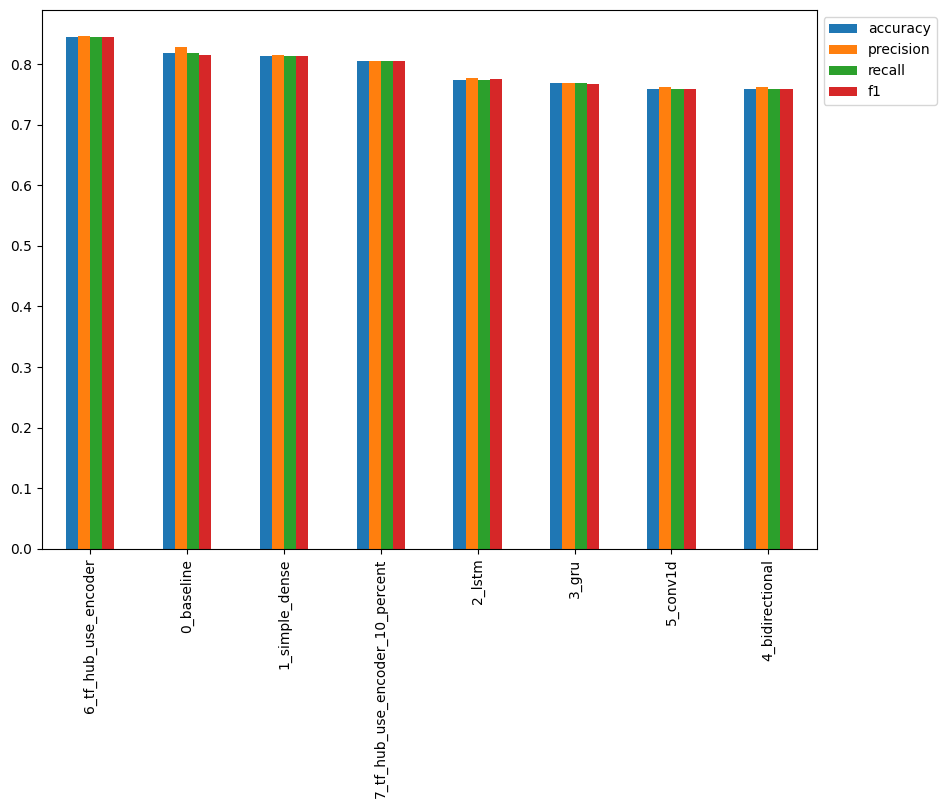

In [125]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

<Axes: >

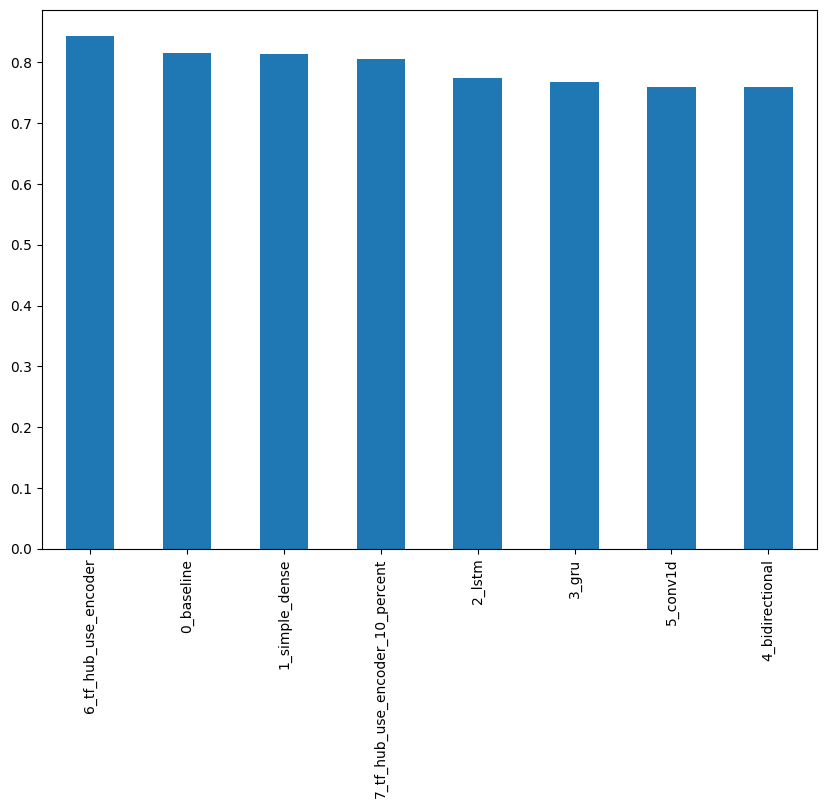

In [127]:
# Plot models based on F1 scores
all_model_results["f1"].plot(kind="bar", figsize=(10,7))

## Saving and loading a trained model

There are two main formats in TF

1. HDF5 Format
2. `SavedModel` Format

In [128]:
model_6_results

{'accuracy': 84.51443569553805,
 'precision': 0.8469145902216768,
 'recall': 0.8451443569553806,
 'f1': 0.8438535006004724}

In [129]:
# Save to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
# Load model with custom Hub layer (required with HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5", custom_objects={"KerasLayer": hub.KerasLayer}) # becuase hub layer came from outside of tensorflow

In [132]:
# How does our loaded model perform
loaded_model_6.evaluate(validation_sentences, val_labels)

24/24 [==============================] - 2s 27ms/step - loss: 0.3728 - accuracy: 0.8451


[0.3728490173816681, 0.8451443314552307]

In [133]:
model_6_results

{'accuracy': 84.51443569553805,
 'precision': 0.8469145902216768,
 'recall': 0.8451443569553806,
 'f1': 0.8438535006004724}

In [134]:
# Now savedmodel format
model_6.save("model_6_SavedModel_format")

In [135]:
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [136]:
loaded_model_6_SavedModel_format.evaluate(validation_sentences, val_labels)

24/24 [==============================] - 3s 22ms/step - loss: 0.3728 - accuracy: 0.8451


[0.3728490173816681, 0.8451443314552307]

In [137]:
model_6_results

{'accuracy': 84.51443569553805,
 'precision': 0.8469145902216768,
 'recall': 0.8451443569553806,
 'f1': 0.8438535006004724}

## Finding the most wrong examples

In [138]:
# Download a pretrained model
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2024-05-15 00:15:52--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  20.8MB/s    in 43s     

2024-05-15 00:16:36 (21.2 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [139]:
# Create a DataFrame with validation sentences and best performing model predictions
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")

In [140]:
model_6_pretrained.evaluate(validation_sentences, val_labels)

24/24 [==============================] - 1s 21ms/step - loss: 0.3458 - accuracy: 0.8583


[0.34579989314079285, 0.8582677245140076]

In [145]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(validation_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))

24/24 [==============================] - 0s 16ms/step


In [146]:
val_df = pd.DataFrame({"text":validation_sentences,
                       "target":val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})

In [148]:
val_df.head()

,text,target,pred,pred_prob
0,#boy #mix Ultimate #preparedness library: http...,1,0.0,0.395501
1,I liked a @YouTube video http://t.co/lAmsdzKCu...,0,0.0,0.156175
2,Flood: Two people dead 60 houses destroyed in ...,1,1.0,0.924586
3,@tanehisicoates even the second half has that ...,0,0.0,0.216460
4,Be annihilated for status education mba on beh...,0,0.0,0.109281


In [149]:
# find the wrong predictions and sort by prediction probabilites
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong

,text,target,pred,pred_prob
171,Snowstorm planned outside #Rome's St Mary Majo...,0,1.0,0.873418
588,County 911 Overload Prompts Use of Emergency P...,0,1.0,0.858913
65,Governor weighs parole for California school b...,0,1.0,0.856527
344,Truck Driver Salvages Banned Tomatoes From Des...,0,1.0,0.843412
69,Family mourns drowning of 'superhero' toddler ...,0,1.0,0.837567
...,...,...,...,...
383,@reriellechan HE WAS THE LICH KING'S FIRST CAS...,1,0.0,0.071257
726,@blakeshelton DON'T be a FART ??in a WINDSTORM...,1,0.0,0.069313
652,Feel like I've got no control of anything that...,1,0.0,0.067387
189,the sunset boys wreck my bed original 1979 u...,1,0.0,0.061777


In [154]:
false_positive = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)[:10]
false_negative = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=True)[:10]

In [155]:
false_positive

,text,target,pred,pred_prob
171,Snowstorm planned outside #Rome's St Mary Majo...,0,1.0,0.873418
588,County 911 Overload Prompts Use of Emergency P...,0,1.0,0.858913
65,Governor weighs parole for California school b...,0,1.0,0.856527
344,Truck Driver Salvages Banned Tomatoes From Des...,0,1.0,0.843412
69,Family mourns drowning of 'superhero' toddler ...,0,1.0,0.837567
574,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
325,York Co. first responders compete to save live...,0,1.0,0.801573
552,#CCOT #TCOT #radiation Nuclear Emergency Track...,0,1.0,0.787579
285,Bloor/Ossington arsonist also burned a mattres...,0,1.0,0.781458
598,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [156]:
false_negative

,text,target,pred,pred_prob
414,Reddit Will Now Quarantine Offensive Content h...,1,0.0,0.058487
189,the sunset boys wreck my bed original 1979 u...,1,0.0,0.061777
652,Feel like I've got no control of anything that...,1,0.0,0.067387
726,@blakeshelton DON'T be a FART ??in a WINDSTORM...,1,0.0,0.069313
383,@reriellechan HE WAS THE LICH KING'S FIRST CAS...,1,0.0,0.071257
211,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...,1,0.0,0.080427
485,My back is so sunburned :(,1,0.0,0.082171
11,Early wake up call from my sister begging me t...,1,0.0,0.090747
236,I was in a horrible car accident this past Sun...,1,0.0,0.090947
336,@TomcatArts thus explaining why you were all a...,1,0.0,0.092150


In [163]:
for df in [false_negative, false_positive]:
  for row in df.itertuples():
    _, text, target, pred, pred_prob = row
    print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
    print(f"Text: \n {text} \n")
    print(130*"-"+"\n")

Target: 1, Pred: 0.0, Prob: 0.058487288653850555
Text: 
 Reddit Will Now Quarantine Offensive Content http://t.co/LTmgdP6Jaf 

----------------------------------------------------------------------------------------------------------------------------------

Target: 1, Pred: 0.0, Prob: 0.06177738681435585
Text: 
 the sunset boys wreck my bed   original 1979 usa gimp label  vinyl 7' 45  newave http://t.co/X0QLgwoyMT http://t.co/hQNx8qMeG3 

----------------------------------------------------------------------------------------------------------------------------------

Target: 1, Pred: 0.0, Prob: 0.06738689541816711
Text: 
 Feel like I've got no control of anything that goes on in my life at the minute. #whirlwind #drained 

----------------------------------------------------------------------------------------------------------------------------------

Target: 1, Pred: 0.0, Prob: 0.06931298226118088
Text: 
 @blakeshelton DON'T be a FART ??in a WINDSTORM.FOLLOW ME ALREADY. JEEZ. 

---

In [164]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [169]:
test_df["text"][:5]

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [172]:
test_sentences = test_df["text"].to_list()
test_sentences[:5]
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Test sample:\n{test_sample}\n")
  print(130*"-"+"\n")

1/1 [==============================] - 0s 36ms/step
Pred: 0, Prob: 0.2618004083633423
Test sample:
Slayer at Rockstar Mayhem Festival #slayer #metal #concertphotography #houston #livemusic #canonÛ_ https://t.co/5FrWySzwrs

----------------------------------------------------------------------------------------------------------------------------------

1/1 [==============================] - 0s 34ms/step
Pred: 0, Prob: 0.07006745785474777
Test sample:
@MeekMill I think its time you consulted @kendricklamar cause @Drake done body bagging you

----------------------------------------------------------------------------------------------------------------------------------

1/1 [==============================] - 0s 35ms/step
Pred: 0, Prob: 0.32674527168273926
Test sample:
@Schwarzenegger @FoxNews you won't because Dems are focused on flooding our borders with illegal immigrants to add to their voters. #EndofUS

------------------------------------------------------------------------------

In [173]:
# Try to predict on actual current disaster tweet on twitter
print(model_6_pretrained.predict(["BREAKING: The image of terror currently experienced in Gaza, where fifity civilians were bombed in a 3-story building in the Nuseirat refugee camp."]))

1/1 [==============================] - 0s 35ms/step
[[0.99184966]]


# The speed/score tradeoff

In [174]:
model_6_results

{'accuracy': 84.51443569553805,
 'precision': 0.8469145902216768,
 'recall': 0.8451443569553806,
 'f1': 0.8438535006004724}

In [175]:
baseline_results

{'accuracy': 81.88976377952756,
 'precision': 0.8277969908744978,
 'recall': 0.8188976377952756,
 'f1': 0.8150344270074752}

In [176]:
# Let's make a function to measure the time of prediciton
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples)
  end_time = time.perf_counter() # end time
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [178]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples = validation_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 24ms/step


(1.4697884990000603, 0.0019288562979003416)

In [180]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, validation_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.049433924999902956, 6.48739173227073e-05)

In [183]:
model_6_pretrained_results = calculate_results(val_labels, model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 85.8267716535433,
 'precision': 0.8588641003207932,
 'recall': 0.8582677165354331,
 'f1': 0.8575412169588642}

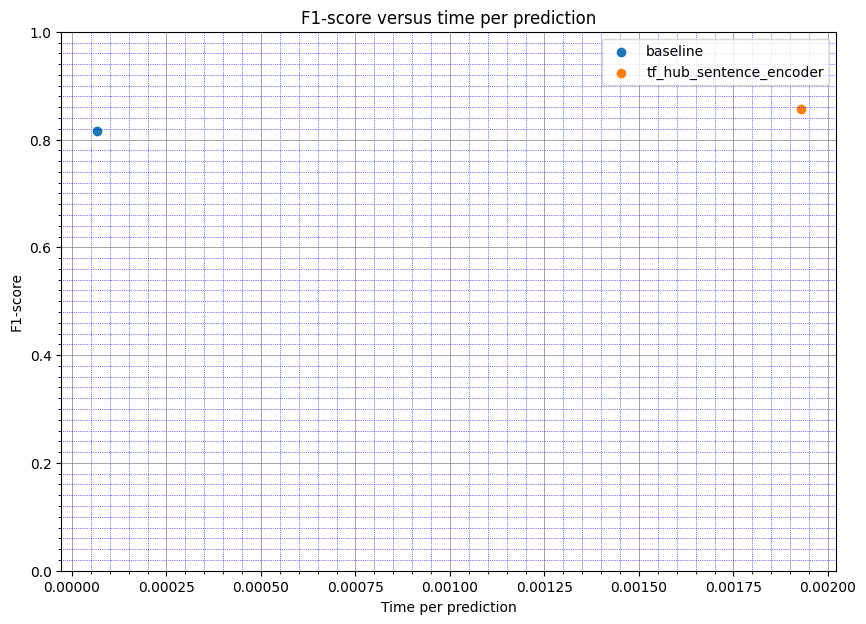

In [196]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score")
plt.ylim((0,1))
plt.grid(True, which='major', color='gray', linestyle='-', linewidth=0.5)

# Enable minor ticks
plt.minorticks_on()

# Set minor tick locator for x-axis and y-axis
# Example: 4 minor intervals within each major interval on the x-axis
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(5))
# Example: 5 minor intervals within each major interval on the y-axis
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(10))

# Customize minor gridlines
plt.grid(which='minor', color='blue', linestyle=':', linewidth=0.5)

In [ ]:
 # Done